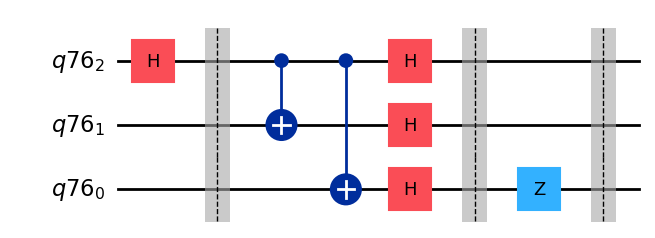

In [169]:
from qiskit import QuantumRegister, QuantumCircuit

qubits = 3
qreg = QuantumRegister(qubits)
qc = QuantumCircuit(qreg)

# note the order of the qubits are reversed in the qiskit
# initialize the state
qc.h(qreg[2])
qc.barrier()
# apply 3-bit repetition code
qc.cx(qreg[2], qreg[1])
qc.cx(qreg[2], qreg[0])
qc.h(qreg[2])
qc.h(qreg[1])
qc.h(qreg[0])
qc.barrier()
# introduce a phase flip error
qc.z(qreg[0])
qc.barrier()

qc.draw(output="mpl", reverse_bits=True)

In [170]:
from qiskit.primitives import StatevectorEstimator as Estimator
from qiskit.quantum_info import SparsePauliOp

x0x1 = SparsePauliOp(["XXI"])
x1x2 = SparsePauliOp(["IXX"])
estimator = Estimator()
job = estimator.run(
    [
        (qc, x0x1),
        (qc, x1x2),
    ]
)
for i, result in enumerate(job.result()):
    data = result.data
    evs = data.evs
    stds = data.stds
    print(f"Expectation value for x{i}x{i+1}: {evs:.0f}")

Expectation value for x0x1: 1
Expectation value for x1x2: -1


In [108]:
from qiskit.quantum_info import Statevector

statevector = Statevector(qc)
statevector.draw("latex")

<IPython.core.display.Latex object>

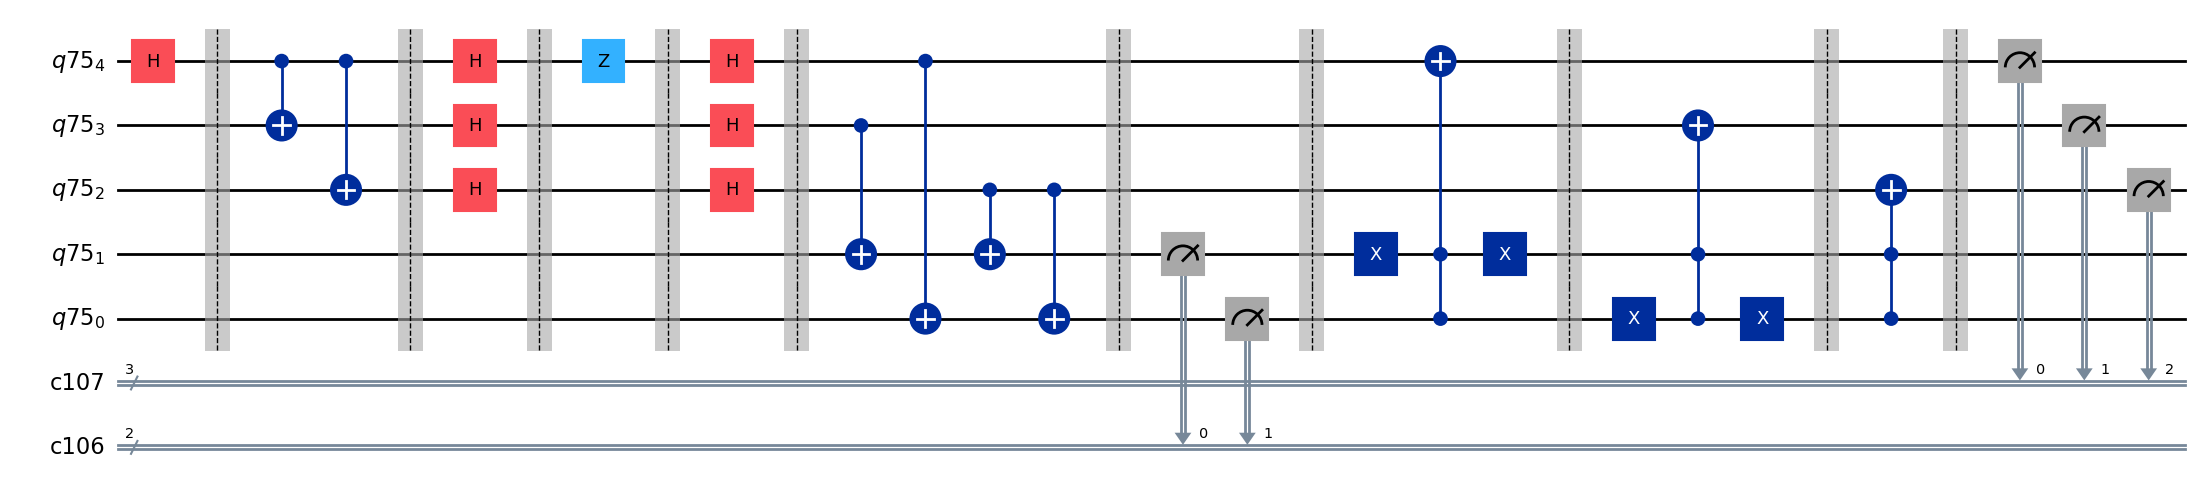

In [167]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

qubits = 3
ancilla = 2
qreg = QuantumRegister(qubits + ancilla)
creg_ancilla = ClassicalRegister(ancilla)
creg_state = ClassicalRegister(qubits)
qc = QuantumCircuit(qreg, creg_ancilla, creg_state)

# note the order of the qubits are reversed in the qiskit
# initialize the state
qc.h(qreg[4])
qc.barrier()
# apply 3-bit repetition code
qc.cx(qreg[4], qreg[3])
qc.cx(qreg[4], qreg[2])
qc.barrier()
# apply Hadamard gates
qc.h(qreg[4])
qc.h(qreg[3])
qc.h(qreg[2])
qc.barrier()
# introduce a bit flip error
qc.z(qreg[4])
qc.barrier()
# apply Hadamard gates
qc.h(qreg[4])
qc.h(qreg[3])
qc.h(qreg[2])
qc.barrier()
# apply syndrome measurement
qc.cx(qreg[3], qreg[1])
qc.cx(qreg[2], qreg[1])
qc.cx(qreg[4], qreg[0])
qc.cx(qreg[2], qreg[0])
qc.barrier()
# measure the syndrome
qc.measure([qreg[1], qreg[0]], creg_ancilla)
qc.barrier()
# correct the error
qc.x(qreg[1])
qc.ccx(qreg[0], qreg[1], qreg[4])
qc.x(qreg[1])
qc.barrier()
qc.x(qreg[0])
qc.ccx(qreg[0], qreg[1], qreg[3])
qc.x(qreg[0])
qc.barrier()
qc.ccx(qreg[0], qreg[1], qreg[2])
qc.barrier()
# measure the corrected state
qc.measure([qreg[4], qreg[3], qreg[2]], creg_state)

qc.draw(output="mpl", reverse_bits=True, fold=-1)

In [168]:
from qiskit_aer import AerSimulator

# execute the circuit and read the results
job = AerSimulator().run(qc, shots=1024)

counts = job.result().get_counts()
for outcome in counts.keys():
    print(outcome[::-1], "is observed", counts[outcome], "times")

01 111 is observed 516 times
01 000 is observed 508 times


In [165]:
from qiskit.quantum_info import Statevector

statevector = Statevector(qc)
statevector.draw("latex")

<IPython.core.display.Latex object>

In [166]:
from qiskit.primitives import StatevectorEstimator as Estimator
from qiskit.quantum_info import SparsePauliOp

z0 = SparsePauliOp(["IIIZI"])
z1 = SparsePauliOp(["IIIIZ"])
estimator = Estimator()
job = estimator.run(
    [
        (qc, z0),
        (qc, z1),
    ]
)
for i, result in enumerate(job.result()):
    data = result.data
    evs = data.evs
    stds = data.stds
    print(f"Expectation value for x{i}: {evs:.0f}")

Expectation value for x0: 1
Expectation value for x1: -1
